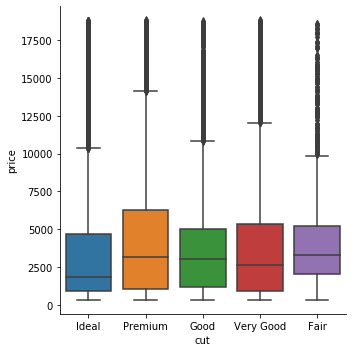

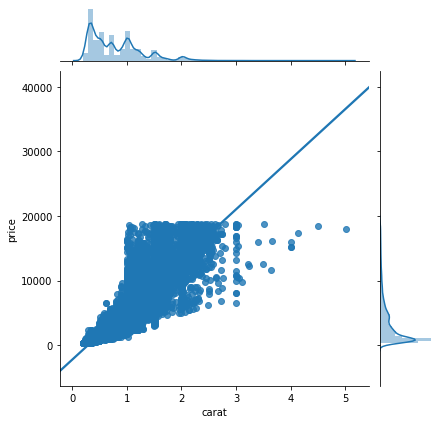

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm  # one way to do regs
from sklearn.linear_model import LinearRegression

diamonds = sns.load_dataset('diamonds')

# remember the relationship between the quality of diamonds and their price:
# low quality diamonds (poor cuts, bad colours, and inferior clarity) have higher prices
sns.catplot(data=diamonds,
                y='price',x='cut',kind='box')

sns.jointplot(data=diamonds,
                y='price',x='carat',kind='reg')

# # sm framework
# model1 = sm.OLS(stuff)
# results1 = model1.fit()
# print(results1.summary())
# resid1 = results1.resid     # can put resid1 in df if you want

# # sklearn framework
# X = ... # 
# y = ... 
# model = LinearRegression()
# model.fit(X, y)
# y_predict = model.predict(X)
# resid1 = y - y_predict

deal with outliers

In [25]:
diamonds2 = (diamonds.query('carat < 2.5')
            .assign(lprice = np.log(diamonds['price']))
            .assign(lcarat = np.log(diamonds['carat']))
            .assign(const = 1))

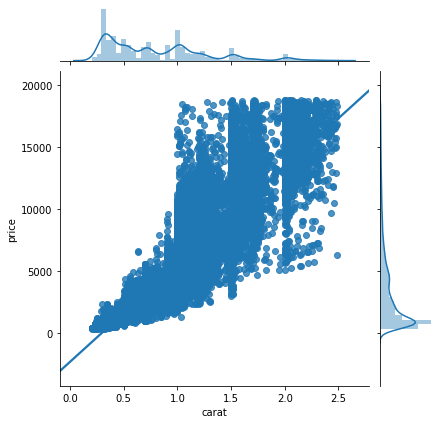

In [26]:
sns.jointplot(data=diamonds2,y='price',x='carat',kind='reg')


In [34]:
# sm framework
y = diamonds2['lprice']
X = diamonds2[['const','lcarat']]
model1 = sm.OLS(y,X)
results1 = model1.fit()
print(results1.summary())
resid1 = results1.resid     # can put resid1 in df if you want

# regression coef mean: for a ONE UNIT increase in X, y will increase by ####

# When log(carat) goes up 1, log(price) goes up 1.68... ON AVERAGE, ALL ELSE EQUAL 

# "log(X) goes up 1" ---> when X goes up by 1 percent
# "y(X) goes up ###" ---> Y goes up by ### percent 

                            OLS Regression Results                            
Dep. Variable:                 lprice   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                 7.542e+05
Date:                Thu, 19 Mar 2020   Prob (F-statistic):               0.00
Time:                        16:11:57   Log-Likelihood:                -4073.2
No. Observations:               53797   AIC:                             8150.
Df Residuals:                   53795   BIC:                             8168.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.4525      0.001   6193.432      0.0

In [36]:
model = LinearRegression()
model.fit(X,y)
y_predict = model.predict(X)
resid1 = y - y_predict
resid1

0       -0.193714
1       -0.040705
2       -0.190651
3       -0.559346
4       -0.668527
5       -0.235083
6       -0.235083
7       -0.366738
8       -0.085763
9       -0.157566
10      -0.601507
11      -0.151666
12      -0.071036
13      -0.642016
14       0.098004
15      -0.692512
16      -0.575305
17      -0.566721
18      -0.566721
19      -0.566721
20      -0.566721
21      -0.116980
22      -0.114143
23      -0.616189
24      -0.616189
25      -0.111314
26      -0.180076
27      -0.549771
28      -0.102876
29      -0.102876
           ...   
53910    0.067839
53911    0.413383
53912    0.299309
53913   -0.156752
53914   -0.238814
53915   -0.092467
53916   -0.025626
53917   -0.354856
53918   -0.070480
53919   -0.070480
53920    0.068565
53921    0.068565
53922    0.068565
53923   -0.001653
53924   -0.001653
53925   -0.134506
53926    0.045070
53927   -0.134506
53928   -0.134506
53929    0.045070
53930    0.045070
53931    0.045070
53932    0.069291
53933    0.069291
53934    0